In [1]:
%load_ext lab_black

# sadie.airr

The airr primary purpose is for annotation of adative receptor nucletodie sequences. The backend uses[IgBLAST](https://www.ncbi.nlm.nih.gov/igblast/) for the inital alignments but abstracts all the difficult parts leaving a smooth pythonic API or command line interface. 

Most importantly, the output it dumps is in compliance with the standards set by [The AIRR community](https://docs.airr-community.org/en/stable/#table-of-contents). These are dumped as AirrTable objects, which is built with a [pandas dataframe](www.pandas.org) and can be manipulated with pandas dataframe operations.

#### Run Single Sequence

In [4]:
# Import library
from sadie.airr import Airr, AirrTable, ScfvAirrTable

# initialize API with species
airr_api = Airr("human")

# Run on Single Sequence
single_seq = """
        CAGCGATTAGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGTCGTCCCTGAGACTCTCCTGTGCAGCGT
        CGGATTCGACTTCAGTAGACAAGGCATGCACTGGGTCCGCCAGGCTCCAGGCCAGGGGCTGGAGTGGGTG
        GCATTTATTAAATATGATGGAAGTGAGAAATATCATGCTGACTCCGTATGGGGCCGACTCAGCATCTCCA
        GAGACAATTCCAAGGATACGCTTTATCTCCAAATGAATAGCCTGAGAGTCGAGGACACGGCTACATATTT
        TTGTGTGAGAGAGGCTGGTGGGCCCGACTACCGTAATGGGTACAACTATTACGATTTCTATGATGGTTA
        TTATAACTACCACTATATGGACGTCTGGGGCAAAGGGACCACGGTCACCGTCTCGAG"""
# heavy chain only
airr_table = airr_api.run_single("test_sequnce", single_seq)

In [5]:
## Airr format table
airr_table

,sequence_id,sequence,species,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,...,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,note,vdj_nt,vdj_aa
0,test_sequnce,CAGCGATTAGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGTCGT...,human,IGH,True,True,True,False,False,False,...,406,285,374,GGCTGGTGGGCCCGACTACCGTAATGGGTACAAC,34,NaN,0,,CAGCGATTAGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGTCGT...,QRLVESGGGVVQPGSSLRLSCAASDSTSVDKACTGSARLQARGWSG...


In [ ]:
paired_final_with_info.loc[:, "v_mutation_heavy"] = paired_final_with_info[["v_identity_heavy"]].apply(
    lambda x: (100 - x) / 100, axis=1
)
paired_final_with_info.loc[:, "v_mutation_light"] = paired_final_with_info[["v_identity_light"]].apply(
    lambda x: (100 - x) / 100, axis=1
)
paired_final_with_info.loc[:, "d_mutation_heavy"] = paired_final_with_info[["d_identity_heavy"]].apply(
    lambda x: (100 - x) / 100, axis=1
)
paired_final_with_info.loc[:, "j_mutation_heavy"] = paired_final_with_info[["j_identity_heavy"]].apply(
    lambda x: (100 - x) / 100, axis=1
)
paired_final_with_info.loc[:, "j_mutation_light"] = paired_final_with_info[["j_identity_light"]].apply(
    lambda x: (100 - x) / 100, axis=1
)

paired_final_with_info.loc[:, "v_mutation_heavy_aa"] = paired_final_with_info[
    ["v_sequence_alignment_aa_heavy", "v_germline_alignment_aa_heavy"]
].apply(lambda x: get_v_aa_distance(x, "heavy"), axis=1)

paired_final_with_info.loc[:, "v_mutation_light_aa"] = paired_final_with_info[
    ["v_sequence_alignment_aa_light", "v_germline_alignment_aa_light"]
].apply(lambda x: get_v_aa_distance(x, "light"), axis=1)

In [23]:
# Type is airr table
type(airr_table)

airr.airrtable.AirrTable

In [24]:
## Access dataframe property
dataframe = airr_table.table
type(dataframe)

pandas.core.frame.DataFrame

#### Run on Fasta File from API

In [104]:
# Import library
from airr import Airr, AirrTable, ScfvAirrTable

# initialize API with species
airr_api = Airr("human")

# test file only currently accepts fasta and compressed fasta
test_file = "tests/fixtures/fasta_inputs/heavy/TB247VHH.fasta"

# Get an airr table
results = airr_api.run_file(test_file)

In [105]:
# get only the sanitized antibodies. e.g full reading frame and no stop codons
sanitized_antibodes = results.sanitized_antibodies

<AxesSubplot:>

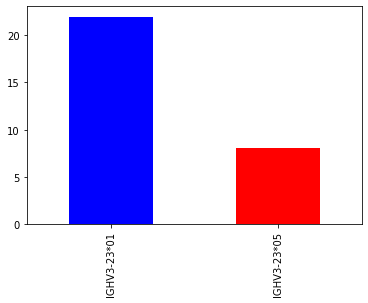

In [46]:
# can use pandas opoerations right on datafarme
sanitized_antibodes["v_call"].str.split(",").str.get(0).value_counts().plot(
    kind="bar", color=["blue", "red"]
)

#### Run on BioPython SeqIO Records

If you have all a weird file format, you can pass BioPython SeqIO Records

In [55]:
from Bio import SeqIO

# In fastaq format, convert to list of SeqRecord
fastq_lists = list(
    SeqIO.parse(
        "tests/fixtures/other_inputs/sample_4_deepcdr_contig_list_trimmed.fq", "fastq"
    )
)
# Only run on subset
fastq_list_sub = fastq_lists[0:1000]

In [58]:
# use run multiple function
fastq_file_airr = airr_api.run_multiple(fastq_list_sub)

In [79]:
# easy metrics
sanitized_len = len(fastq_file_airr.sanitized_antibodies)
all_len = len(fastq_file_airr)
print(f"{all_len} total antibodies, {sanitized_len} sanitized_antibodies")

1000 total antibodies, 755 sanitized_antibodies


#### Run on Linked Heavy and Light Chains

When the heavy and light chain are in the same fasta read, pass `scfv=True` to get a joined Airr Tagble

In [ ]:
## now we can run an scfv file
scfv_file = (
    "tests/fixtures/fasta_inputs/paired/2545_all_no_umi_contigs_full_length.fasta"
)
scfv_output = airr_api.run_file(scfv_file, scfv=True)

In [114]:
# notice that the airr fields have been appended with a _heavy or _light tag for heavy and light chain
scfv_output.table.head(3)

,sequence_id,sequence,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,d_call_heavy,...,fwr4_end_light,cdr3_start_light,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,vdj_nt_light,vdj_aa_light,species
0,2545_PLATE_tb236-r01_SAMPLE_A02_CONTIG_1,CCACCAGCCCACCTCCGCGCTAATGCGCATCAACTAGCATTGATGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,,,human
1,2545_PLATE_tb236-r01_SAMPLE_A03_CONTIG_1,GACAGCTATCGCGATTGCAGTGGCACTGGCTGGTTTCGCTACCGTG...,IGH,False,False,False,True,False,IGLV3-6*02,"IGHD2-15*01,IGHD2-2*01,IGHD2-2*02",...,356,330,334,TCATGGCGCATATCCGTATGATGTGCCGGACTATGCTT,38,NaN,<NA>,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,DIQMTQSPSSLSASVGDRVTITCRASESIGSYLNWYQQKPGKAPKL...,human
2,2545_PLATE_tb236-r01_SAMPLE_A04_CONTIG_1,CACCGGGCCCAGGCGGCCGAGCTCGACATCCAGATGACCCAGTCTC...,IGH,False,True,True,False,True,"IGHV3-23*01,IGHV3-23*05,IGHV3-23D*01","IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",...,347,289,315,AGTTCCTCGG,10,NaN,<NA>,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,DIQMTQSPSSLSASVGDRVTITCRAGQSIRSYLNWYQQKPGKAPKL...,human


In [115]:
# Only want paired reads. That is, Productive for both heavy and light chain
joined_and_sanitized = scfv_output.get_joined_and_sanatized()
joined_and_sanitized.head(3)

,sequence_id,sequence,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,d_call_heavy,...,fwr4_start_light,fwr4_end_light,cdr3_start_light,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,vdj_nt_light,vdj_aa_light
0,2545_PLATE_tb238-r01_SAMPLE_E02_CONTIG_1,GACAGCTATCGCGATTGCAGTGGCACTGGCTGGTTTCGCTACCGTG...,IGH,False,True,True,False,True,"IGHV3-23*01,IGHV3-23D*01",IGHD6-19*01,...,356,387,329,355,CATTCCCCCGTTCA,14,NaN,<NA>,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,DIQMTQSPSSLSASVGDRVTITCRASQRISRYLNWYQQKPGKAPKL...
1,2545_PLATE_tb238-r01_SAMPLE_A11_CONTIG_1,GACAGCTATCGCGATTGCAGTGGCACTGGCTGGTTTCGCTACCGTG...,IGH,False,True,True,False,True,"IGHV3-23*01,IGHV3-23D*01",IGHD6-19*01,...,359,390,329,358,GCGAT,5,NaN,<NA>,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,DIQMTQSPSSLSASVGDRVTITCRASQSISRYLSWYQQKPGKAPKL...
2,2545_PLATE_tb238-r01_SAMPLE_C09_CONTIG_1,GACAGCTATCGCGATTGCAGTGGCACTGGCTGGTTTCGCTACCGTG...,IGH,False,True,True,False,True,"IGHV3-23*01,IGHV3-23D*01",IGHD6-19*01,...,356,387,329,355,CATTCCCCCGTTCA,14,NaN,<NA>,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,DIQMTQSPSSLSASVGDRVTITCRASQRISRYLNWYQQKPGKAPKL...
